In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import psycopg2 # драйвер для postgresql
import getpass  # прячем пароль, чтобы не писать его в параметрах

conn=psycopg2.connect(user='postgres',
                      database='postgres',
                      host='localhost',
                      port='5432',
                      password=getpass.getpass('Insert password: ')
                        )
print(conn.get_dsn_parameters())

Insert password: ········
{'user': 'postgres', 'dbname': 'postgres', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'}


In [3]:
# Запрос кодов бумаг
import pandas as pd
query_sec="SELECT DISTINCT \"SECCODE\" FROM order_log ORDER BY \"SECCODE\" ASC"
securities=pd.read_sql_query(query_sec,conn)
securities[50:70].head()

,SECCODE
50,FXGD
51,FXIT
52,FXJP
53,FXMM
54,FXRB


In [4]:
# Получение данных из базы
import pandas as pd
query = "SELECT * FROM order_log WHERE \"TIME\" <= 100500000 AND \"SECCODE\" = 'ALRS';"
data = pd.read_sql_query(query,conn)
data.head(10)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
0,49,ALRS,S,100000000,49,1,54.08,600,NaN,NaN
1,50,ALRS,S,100000000,50,1,53.92,2200,NaN,NaN
2,62,ALRS,B,100000000,62,1,52.33,400,NaN,NaN
3,71,ALRS,B,100000000,71,1,52.53,100,NaN,NaN
4,348,ALRS,S,100000000,348,1,55.09,200,NaN,NaN
5,350,ALRS,S,100000000,350,1,55.42,300,NaN,NaN
6,781,ALRS,S,100000000,781,1,53.94,2500,NaN,NaN
7,1077,ALRS,S,100000000,1077,1,54.74,2500,NaN,NaN
8,1204,ALRS,S,100000000,1204,1,54.99,100,NaN,NaN
9,1210,ALRS,S,100000000,1210,1,54.98,100,NaN,NaN


In [5]:
#Сортировка по цене в убывающем порядке
data.sort_values(by=['PRICE'], ascending = False)

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
921,139295,ALRS,S,100157834,75176,1,59.80,5300,NaN,NaN
224,12191,ALRS,S,100002070,11130,1,58.70,100,NaN,NaN
126,6851,ALRS,S,100000000,6851,1,58.00,2500,NaN,NaN
11,1261,ALRS,S,100000000,1261,1,58.00,1000,NaN,NaN
48,3197,ALRS,S,100000000,3197,1,57.48,1000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1601,353258,ALRS,S,100443535,180847,1,0.00,100,NaN,NaN
1633,351471,ALRS,S,100442480,179952,2,0.00,500,2.541198e+09,53.51
952,161283,ALRS,B,100215099,85840,1,0.00,500,NaN,NaN
953,161284,ALRS,B,100215099,85840,2,0.00,500,2.541194e+09,53.74


In [6]:
data.pivot_table(index = 'PRICE', columns = 'BUYSELL', values = 'VOLUME', aggfunc = 'sum').sort_values(by=['PRICE'], ascending = False)

BUYSELL,B,S
PRICE,,
59.80,NaN,5300.0
58.70,NaN,100.0
58.00,NaN,3500.0
57.48,NaN,1000.0
57.35,NaN,100.0
...,...,...
48.61,4100.0,NaN
48.30,5000.0,NaN
48.25,4600.0,NaN


In [7]:
#Поиск значений, где цена =0 (рыночные заявки)
data[data['PRICE']==0.0]

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
952,161283,ALRS,B,100215099,85840,1,0.0,500,NaN,NaN
953,161284,ALRS,B,100215099,85840,2,0.0,500,2.541194e+09,53.74
1554,339853,ALRS,S,100433666,174170,1,0.0,200,NaN,NaN
1556,339855,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1558,339857,ALRS,S,100433666,174170,2,0.0,100,2.541198e+09,53.58
1559,341994,ALRS,S,100435201,175227,1,0.0,200,NaN,NaN
1562,341996,ALRS,S,100435201,175227,2,0.0,200,2.541198e+09,53.58
1583,351473,ALRS,S,100442480,179952,2,0.0,1400,2.541198e+09,53.51
1601,353258,ALRS,S,100443535,180847,1,0.0,100,NaN,NaN
1603,353260,ALRS,S,100443535,180847,2,0.0,100,2.541198e+09,53.51


In [8]:
# Построение книги лимитированных заявок (LOB - Limit Order Book)

# Устанавливаем маску лимитных заявок заявках (цена не равна 0)
no_mrk_ind=data['PRICE']!=0
#  Таблица выставленных заявок при условии, что цена не равна 0
plc=data[['ORDERNO','BUYSELL','PRICE','VOLUME']][(data['ACTION']==1) & no_mrk_ind]
# Таблица отозванных заявок при условии, что цена не равна 0
wdr=data[['ORDERNO','VOLUME']][(data['ACTION']==0) & no_mrk_ind]
# Таблица исполненных объемов
trds=data[['ORDERNO','VOLUME']][(data['ACTION']==2) & no_mrk_ind] 
trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
trds['ORDERNO']=trds.index
trds.index=range(trds.shape[0])

# Книга (aka стакан, aka LOB)
lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
lob=pd.merge(lob,trds, on='ORDERNO', how='left')
lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
lob=lob.fillna(0)
lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
lob=lob[lob['TOTAL_VOL']>0]
lob 

,ORDERNO,BUYSELL,PRICE,VOLUME_plc,VOLUME_wdr,VOLUME_trds,TOTAL_VOL
0,49,S,54.08,600,0.0,0.0,600.0
2,62,B,52.33,400,0.0,0.0,400.0
4,348,S,55.09,200,0.0,0.0,200.0
5,350,S,55.42,300,0.0,0.0,300.0
6,781,S,53.94,2500,0.0,0.0,2500.0
...,...,...,...,...,...,...,...
973,187918,S,56.20,700,0.0,0.0,700.0
974,187919,S,56.35,700,0.0,0.0,700.0
975,188155,B,53.25,5000,0.0,0.0,5000.0
976,188158,B,53.27,1000,0.0,0.0,1000.0


In [9]:
#Сумма объема до рассматриваемого промежутка времени
sum(lob['TOTAL_VOL'])

542700.0

In [10]:
# Стакан заявок
lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
lob.sort_index(axis=0,inplace=True, ascending=False)
lob=lob.fillna(0)
lob

BUYSELL,B,S
PRICE,,
59.80,0.0,5300.0
58.70,0.0,100.0
58.00,0.0,3500.0
57.48,0.0,1000.0
57.35,0.0,100.0
...,...,...
49.30,4500.0,0.0
48.61,4100.0,0.0
48.30,5000.0,0.0


In [11]:
import numpy as np
bid, ask = lob['B'].index[0:5], lob['S'].index[-6:-1]
ind = np.concatenate((bid, ask))
best_lob = lob.loc[ind]
best_lob            


BUYSELL,B,S
PRICE,,
59.80,0.0,5300.0
58.70,0.0,100.0
58.00,0.0,3500.0
57.48,0.0,1000.0
57.35,0.0,100.0
49.74,7000.0,0.0
49.30,4500.0,0.0
48.61,4100.0,0.0
48.30,5000.0,0.0


In [12]:
best_lob=lob.loc[ask.append(bid)]
best_bid=max(lob[lob['B']>0].index)
best_ask=min(lob[lob['S']>0].index)
print(best_ask, best_bid)



53.57 53.53


In [13]:
#Бид и аск котируемый объем вне зависимости от цены
ask_quoted_volume = sum(lob['S'])
bid_quoted_volume =sum(lob['B'])
av_quoted_volume = (ask_quoted_volume+bid_quoted_volume)/2
print(ask_quoted_volume,bid_quoted_volume,av_quoted_volume)

362100.0 180600.0 271350.0


Bid-ask spread: -0.03999999999999915


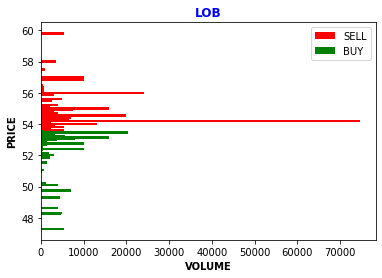

In [14]:
#Визуализация стакана лимитированных заявок до заданного момента времени
import matplotlib.pyplot as plt

font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 12,
        }

fig, ax = plt.subplots()
plt.title('LOB',loc='center',fontdict =font)
x = lob.index
y1 = lob['S']
y2 = lob['B']
plt.barh(x,y1,height = 0.15, label = 'SELL', color = 'r')
plt.barh(x,y2,height = 0.15, label = 'BUY', color = 'g')
plt.xlabel('VOLUME',weight= 'bold',size = 10)
plt.ylabel('PRICE',weight= 'bold',size = 10)
best_bid = max(lob[lob['B']>0].index)
best_ask = min(lob[lob['S']>0].index)
bid_ask_spread=best_bid-best_ask
print('Bid-ask spread:', bid_ask_spread)
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
def convert(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    
    return(times)

convert('\'ALRS\'',100000000, 110000000, 5, 'm',conn) 
        

[100000000,
 100500000,
 101000000,
 101500000,
 102000000,
 102500000,
 103000000,
 103500000,
 104000000,
 104500000,
 105000000,
 105500000,
 110000000]

In [16]:
import pandas as pd
import numpy as np

def calc(sec, time_s, time_e, step, typE, conn):
    
    # time_s = левая часть интервала времени (HHMMSSZZZ)
    # time_e = правая часть интервала (HHMMSSZZZ)
    # step = длительность шага (т.е. для пятиминутного шага step = 5)
    # typE = единица измерения шага ('h', 'm', 's' или любое другое обозначение для миллисекунд)
    # sec = код бумаги в формате '\'CODE\''
    # conn = connection
    
    query="SELECT * FROM order_log WHERE \"TIME\"<="+str(time_e)+" AND \"SECCODE\"="+sec
    orders=pd.read_sql_query(query,conn)
        
    # Переводим начальное время в миллисекунды
    dts = str(time_s)
    h,m,s,z = int(dts[:2]),int(dts[2:4]),int(dts[4:6]),int(dts[6:])
    tsm = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим конечное время в миллисекунды
    dte = str(time_e)
    h,m,s,z = int(dte[:2]),int(dte[2:4]),int(dte[4:6]),int(dte[6:])
    tem = h * 3600000 + m * 60000 + s * 1000 + z
    
    # Переводим шаг в миллисекунды
    if typE == 'h':
        step = step * 3600000
    elif typE == 'm':
        step = step * 60000
    elif typE == 's':
        step = step * 1000

    times = []
    
    while tsm < tem:
        
        # Разбиваем время на отдельные часы, минуты, секунды и миллисекунды
        ha = tsm // 3600000
        ma = (tsm % 3600000) // 60000
        sa = (tsm % 60000) // 1000
        za = tsm % 1000
        
        # Переводим текущее время в "привычный формат"; добавляем его в список
        tmp = ha * 10000000 + ma * 100000 + sa * 1000 + za
        times.append(tmp)
        
        tsm = tsm + step;
    
    # Добавляем конечное время в список
    times.append(time_e)
    # Создаем пустой датафрейм
    
    results = pd.DataFrame(columns=['SECCODE','TIME','MID_PRICE','BA_SPREAD','BEST_B_VOL','BEST_S_VOL','M_imbalance','Bid_quoted_volume','Ask_quoted_volume','Quoted_spread','Av_quoted_volume','Best_bid','Best_ask','Total_volume'])
    
    # Далее идет функция расчета показателей
    MID_PRICE = []
    BA_SPREAD = []
    BEST_B_VOL = []
    BEST_S_VOL = []
    M_imbalance = []
    Bid_quoted_volume = []
    Ask_quoted_volume = []
    Quoted_spread = []
    Av_quoted_volume= []
    Best_bid = []
    Best_ask = []
    Total_volume = []
             
    for i in times:
        
        orders_i = orders[orders['TIME']<=i]
        
    # Устанавливаем маску лимитных заявок
        no_mrk_ind=orders_i['PRICE']!=0

    # Таблица выставленных заявок
        plc=orders_i[['ORDERNO','BUYSELL','PRICE','VOLUME']][(orders_i['ACTION']==1) & no_mrk_ind]

    # Таблица отозванных заявок
        wdr=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==0) & no_mrk_ind]
    
    # Таблица исполненных объемов
        trds=orders_i[['ORDERNO','VOLUME']][(orders_i['ACTION']==2) & no_mrk_ind] 
        trds=trds[['ORDERNO','VOLUME']].groupby(['ORDERNO']).sum()
        trds['ORDERNO']=trds.index
        trds.index=range(trds.shape[0])

    # Книга (aka стакан, aka LOB)
        lob=pd.merge(plc,wdr, on='ORDERNO',how='left',suffixes=('_plc','_wdr'))
        lob=pd.merge(lob,trds, on='ORDERNO', how='left')
        lob=lob.rename(columns={'VOLUME':'VOLUME_trds'})
        lob=lob.fillna(0)
        lob['TOTAL_VOL']=lob['VOLUME_plc']-lob['VOLUME_wdr']-lob['VOLUME_trds']
        lob=lob[lob['TOTAL_VOL']>0]
        
        #Поиск объема на каждом из интервалов
        total_volume = sum(lob['TOTAL_VOL'])
        Total_volume.append(total_volume)
        
        #Построение стакана       
        lob=lob.pivot_table(index='PRICE',columns='BUYSELL',values='TOTAL_VOL',aggfunc='sum')
        lob.sort_index(axis=0,inplace=True, ascending=False)
        lob=lob.fillna(0)
        
        bid = lob[lob['B']>0].index[0:5]
        ask = lob[lob['S']>0].index[-6:]
        ask.append(bid)
        best_lob=lob.loc[ask.append(bid)]
        
        #Нахождение лучшей цены bid и ask
    
        best_bid=max(lob[lob['B']>0].index)
        best_ask=min(lob[lob['S']>0].index)
        Best_bid.append(best_bid)
        Best_ask.append(best_ask)
        
        #Расчет показателей ценовой динамики и ликвидности, вычисляемые на основе книги лимитированных заявок
         
        mid_price=(best_bid+best_ask)/2
        MID_PRICE.append(mid_price)
        
        #Переведем в базисные пункты для расчетов PCA bid_ask spread

        bid_ask_spread=(best_ask-best_bid)*10000
        BA_SPREAD.append(bid_ask_spread)
        
        best_B_vol = lob['B'].loc[best_bid]
        BEST_B_VOL.append(best_B_vol)
        
        best_S_vol = lob['S'].loc[best_ask]
        BEST_S_VOL.append(best_S_vol)
        
        market_imbalance = (best_B_vol-best_S_vol)/ (best_B_vol+best_S_vol)
        M_imbalance.append(market_imbalance)
        
        bid_quoted_volume = sum(lob['B'])
        Bid_quoted_volume.append(bid_quoted_volume)   
        
        ask_quoted_volume = sum(lob['S'])
        Ask_quoted_volume.append(ask_quoted_volume)
        
        quoted_spread = ((best_ask-best_bid)/mid_price)*100
        Quoted_spread.append(quoted_spread)
        
        av_quoted_volume =(bid_quoted_volume+ask_quoted_volume)/2
        Av_quoted_volume.append(av_quoted_volume)
        
                                     
    results = pd.DataFrame({'SECCODE':sec, 'TIME': times,'MID_PRICE': MID_PRICE,'BA_SPREAD':BA_SPREAD,'BEST_B_VOL':BEST_B_VOL,'BEST_S_VOL':BEST_S_VOL, 'M_imbalance':M_imbalance,'Bid_quoted_volume':Bid_quoted_volume, 'Ask_quoted_volume':Ask_quoted_volume, 'Quoted_spread':Quoted_spread,'Av_quoted_volume':Av_quoted_volume,'Best_bid':best_bid,'Best_ask':best_ask,'Total_volume':Total_volume})    
    results['MID_PRICE'] = MID_PRICE
    results['BA_SPREAD'] = BA_SPREAD
    results['BEST_B_VOL'] = BEST_B_VOL
    results['BEST_S_VOL'] = BEST_S_VOL
    results['M_imbalance'] = M_imbalance
    results['TIME']= times
    results['Bid_quoted_volume']= Bid_quoted_volume
    results['Ask_quoted_volume']=Ask_quoted_volume
    results['Quoted_spread']=Quoted_spread
    results['Av_quoted_volume']=Av_quoted_volume
    results['Best_bid']=Best_bid
    results['Best_ask']=Best_ask
    results['Total_volume']=Total_volume
 
    
    return results   

In [18]:
x=calc('\'ALRS\'', 100000000, 190000000, 1, 'm', conn)
x

,SECCODE,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'ALRS',100000000,53.895,500.0,100.0,2200.0,-0.913043,69800.0,229100.0,0.092773,149450.0,53.87,53.92,298900.0
1,'ALRS',100100000,53.655,1100.0,100.0,600.0,-0.714286,151200.0,298700.0,0.205014,224950.0,53.60,53.71,449900.0
2,'ALRS',100200000,53.680,1200.0,1000.0,1500.0,-0.200000,170400.0,330000.0,0.223547,250200.0,53.62,53.74,500400.0
3,'ALRS',100300000,53.735,1300.0,600.0,2300.0,-0.586207,195300.0,331100.0,0.241928,263200.0,53.67,53.80,526400.0
4,'ALRS',100400000,53.650,600.0,400.0,200.0,0.333333,186800.0,360000.0,0.111836,273400.0,53.62,53.68,546800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,'ALRS',185600000,54.775,1500.0,900.0,1000.0,-0.052632,8800.0,2000.0,0.273848,5400.0,54.70,54.85,10800.0
537,'ALRS',185700000,54.775,1500.0,900.0,1000.0,-0.052632,8800.0,2000.0,0.273848,5400.0,54.70,54.85,10800.0
538,'ALRS',185800000,54.775,1500.0,900.0,1000.0,-0.052632,8800.0,2000.0,0.273848,5400.0,54.70,54.85,10800.0
539,'ALRS',185900000,54.775,1500.0,900.0,1000.0,-0.052632,8800.0,2000.0,0.273848,5400.0,54.70,54.85,10800.0


In [20]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\ALRS.xlsx') as writer:
    x.to_excel(writer)

In [21]:
import numpy as np
#Расчет лямбды для стороны Bid
best_a_b = pd.DataFrame(x, columns = ['TIME','Best_bid','Best_ask'])
price_diff = best_a_b.Best_bid.diff()
#Поиск 90- персентиля и лямбды Bid
trades = x['Total_volume']
per_trades_90 = np.percentile(trades, 90)
print(per_trades_90)
#Лямбда Bid считается в базисных пунктах
lambda_bid = pd.DataFrame((abs(price_diff)/per_trades_90)*10000).rename(columns={'Best_bid':'lambda_bid'})
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b.Best_ask.diff()
#Лямбда ask считается в базисных пунктах
lambda_ask = pd.DataFrame((abs(price_diff_1)/per_trades_90)*10000).rename(columns={'Best_ask':'lambda_ask'})
lambdas = pd.concat([lambda_bid,lambda_ask],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda = pd.DataFrame(lambdas.mean(axis=1))
av_lambda.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda = pd.DataFrame(1/av_lambda)
inv_lambda.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb = pd.concat([x[['TIME']],lambda_bid,lambda_ask,av_lambda,inv_lambda],axis = 1).replace(np.nan,0)
lamb   

1668200.0


,TIME,lambda_bid,lambda_ask,Average_lambda,Inverse_lambda
0,100000000,0.000000,0.000000,0.000000,0.000000
1,100100000,0.001619,0.001259,0.001439,695.083333
2,100200000,0.000120,0.000180,0.000150,6672.800000
3,100300000,0.000300,0.000360,0.000330,3033.090909
4,100400000,0.000300,0.000719,0.000510,1962.588235
...,...,...,...,...,...
536,185600000,0.000000,0.000000,0.000000,inf
537,185700000,0.000000,0.000000,0.000000,inf
538,185800000,0.000000,0.000000,0.000000,inf
539,185900000,0.000000,0.000000,0.000000,inf


In [22]:
x.describe()

,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02,541.000000,5.410000e+02,541.000000,541.000000,5.410000e+02
mean,1.430370e+08,54.317985,348.243993,3821.256932,10325.323475,-0.122759,389668.761553,7.567930e+05,0.063990,5.732309e+05,54.300573,54.335397,1.146462e+06
std,2.595684e+07,0.582696,298.672470,9445.065883,32273.316093,0.596679,131348.998516,3.763500e+05,0.054624,2.251517e+05,0.579603,0.586153,4.503035e+05
min,1.000000e+08,53.250000,100.000000,100.000000,100.000000,-0.997765,8800.000000,2.000000e+03,0.018088,5.400000e+03,53.220000,53.280000,1.080000e+04
25%,1.215000e+08,53.665000,200.000000,700.000000,1000.000000,-0.669903,326100.000000,5.283000e+05,0.036383,4.314000e+05,53.650000,53.670000,8.628000e+05
50%,1.430000e+08,54.485000,300.000000,1500.000000,2300.000000,-0.142857,408500.000000,7.134000e+05,0.054660,5.871000e+05,54.460000,54.500000,1.174200e+06
75%,1.645000e+08,54.850000,400.000000,3000.000000,3900.000000,0.405941,445000.000000,9.636000e+05,0.074432,6.806000e+05,54.830000,54.870000,1.361200e+06
max,1.900000e+08,55.285000,1500.000000,93800.000000,268100.000000,0.997861,725600.000000,2.163200e+06,0.273848,1.296800e+06,55.280000,55.290000,2.593600e+06


In [23]:
y = calc('\'SBER\'', 100000000, 190000000, 1, 'm', conn)
y

,SECCODE,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
0,'SBER',100000000,106.865,300.0,10.0,24480.0,-0.999183,1446630.0,2164490.0,0.028073,1805560.0,106.85,106.88,3611120.0
1,'SBER',100100000,106.280,200.0,50.0,450.0,-0.800000,1816890.0,2087810.0,0.018818,1952350.0,106.27,106.29,3904700.0
2,'SBER',100200000,106.265,100.0,5160.0,400.0,0.856115,1916880.0,1825700.0,0.009410,1871290.0,106.26,106.27,3742580.0
3,'SBER',100300000,106.070,400.0,750.0,1250.0,-0.250000,1832520.0,2017690.0,0.037711,1925105.0,106.05,106.09,3850210.0
4,'SBER',100400000,106.255,300.0,2540.0,700.0,0.567901,2345650.0,1751940.0,0.028234,2048795.0,106.24,106.27,4097590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,'SBER',185600000,109.775,2500.0,400.0,9300.0,-0.917526,16540.0,91680.0,0.227739,54110.0,109.65,109.90,108220.0
537,'SBER',185700000,109.775,2500.0,400.0,9300.0,-0.917526,16540.0,91680.0,0.227739,54110.0,109.65,109.90,108220.0
538,'SBER',185800000,109.775,2500.0,400.0,9300.0,-0.917526,16540.0,91680.0,0.227739,54110.0,109.65,109.90,108220.0
539,'SBER',185900000,109.775,2500.0,400.0,9300.0,-0.917526,16540.0,91680.0,0.227739,54110.0,109.65,109.90,108220.0


In [25]:
y.describe()

,TIME,MID_PRICE,BA_SPREAD,BEST_B_VOL,BEST_S_VOL,M_imbalance,Bid_quoted_volume,Ask_quoted_volume,Quoted_spread,Av_quoted_volume,Best_bid,Best_ask,Total_volume
count,5.410000e+02,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02,5.410000e+02,541.000000,5.410000e+02,541.000000,541.000000,5.410000e+02
mean,1.430370e+08,108.282033,313.863216,8229.704251,8377.818854,0.028758,3.978215e+06,4.389689e+06,0.028906,4.183952e+06,108.266340,108.297726,8.367905e+06
std,2.595684e+07,1.248341,427.624848,30543.886627,27195.476204,0.669140,1.078863e+06,2.276314e+06,0.038958,1.533066e+06,1.244588,1.252448,3.066132e+06
min,1.000000e+08,105.430000,100.000000,10.000000,10.000000,-0.999483,1.654000e+04,9.168000e+04,0.009082,5.411000e+04,105.420000,105.440000,1.082200e+05
25%,1.215000e+08,107.385000,100.000000,1000.000000,750.000000,-0.578626,3.968480e+06,2.584070e+06,0.009338,3.409490e+06,107.370000,107.400000,6.818980e+06
50%,1.430000e+08,107.960000,200.000000,2310.000000,2230.000000,0.067416,4.271030e+06,3.598820e+06,0.018603,3.898745e+06,107.950000,107.970000,7.797490e+06
75%,1.645000e+08,109.705000,300.000000,5100.000000,6110.000000,0.662921,4.562710e+06,6.727840e+06,0.027945,5.578820e+06,109.650000,109.710000,1.115764e+07
max,1.900000e+08,110.135000,2500.000000,479520.000000,481700.000000,0.998768,5.368510e+06,1.070913e+07,0.227739,7.840310e+06,110.120000,110.150000,1.568062e+07


In [26]:
#Дейтафрейм для Альросы для расчета PCA
import pandas as pd
df = pd.DataFrame(x,columns = ['TIME','BA_SPREAD','Av_quoted_volume'])
liq_metrics = pd.merge(df,lamb,on=['TIME'])
Liq_met = liq_metrics.drop(liq_metrics.columns[[3,4,6]], axis=1)
Liq_met

,TIME,BA_SPREAD,Av_quoted_volume,Average_lambda
0,100000000,500.0,149450.0,0.000000
1,100100000,1100.0,224950.0,0.001439
2,100200000,1200.0,250200.0,0.000150
3,100300000,1300.0,263200.0,0.000330
4,100400000,600.0,273400.0,0.000510
...,...,...,...,...
536,185600000,1500.0,5400.0,0.000000
537,185700000,1500.0,5400.0,0.000000
538,185800000,1500.0,5400.0,0.000000
539,185900000,1500.0,5400.0,0.000000


In [30]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\ALRS_liquidity_metrics.xlsx') as writer:
    Liq_met.to_excel(writer)

In [31]:
#Cтандартизация мер ликвидности для Альросы
from sklearn.preprocessing import StandardScaler
features = ['BA_SPREAD','Average_lambda','Av_quoted_volume']
# Отделение features
x1= Liq_met.loc[:, features].values
# Отделение времени
y1 = Liq_met.loc[:,['TIME']].values
# Standardizing 
x1 = StandardScaler().fit_transform(x1)
x1 = pd.DataFrame(x1,columns = ['BA_SPREAD','Average_lambda','Av_quoted_volume'])
x1

,BA_SPREAD,Average_lambda,Av_quoted_volume
0,0.508572,-0.648404,-1.883943
1,2.519321,5.255438,-1.548303
2,2.854446,-0.033421,-1.436053
3,3.189570,0.704560,-1.378261
4,0.843697,1.442540,-1.332916
...,...,...,...
536,3.859820,-0.648404,-2.524326
537,3.859820,-0.648404,-2.524326
538,3.859820,-0.648404,-2.524326
539,3.859820,-0.648404,-2.524326


In [32]:
#Расчет PCA (3 столбца сворачиваются в один)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x1)
print("Variance of PCA1 is % s"
      %pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])
principalDf


Variance of PCA1 is [0.53823558]


,principal component 1
0,1.440526
1,4.222543
2,2.911772
3,3.306096
4,1.876248
...,...
536,4.163754
537,4.163754
538,4.163754
539,4.163754


In [33]:
#Наложение оси времени
finalDf = pd.concat([principalDf, df[['TIME']]], axis = 1)
finalDf = finalDf.set_index('TIME')
finalDf

,principal component 1
TIME,
100000000,1.440526
100100000,4.222543
100200000,2.911772
100300000,3.306096
100400000,1.876248
...,...
185600000,4.163754
185700000,4.163754
185800000,4.163754


In [34]:
#Расчет лямбды для стороны Bid для Сбера
best_a_b1 = pd.DataFrame(y, columns = ['TIME','Best_bid','Best_ask'])
price_diff1 = best_a_b1.Best_bid.diff()
#Поиск 90- персентиля и лямбды Bid
trades1 = y['Total_volume']
per_trades1_90 = np.percentile(trades1, 90)
print(per_trades1_90)
lambda_bid1= pd.DataFrame((abs(price_diff1)/per_trades1_90)*10000).rename(columns={'Best_bid':'lambda_bid'})
#Расчет лямбды для стороны Ask
price_diff_1 = best_a_b1.Best_ask.diff()
lambda_ask1 = pd.DataFrame((abs(price_diff_1)/per_trades1_90)*10000).rename(columns={'Best_ask':'lambda_ask'})
lambdas1 = pd.concat([lambda_bid1,lambda_ask1],axis = 1)
#Поиск среднего значения лямбды и переведем в базисные пункты
av_lambda1 = pd.DataFrame(lambdas1.mean(axis=1))
av_lambda1.columns=['Average_lambda']
#Поиск обратного показателя глубины - Inverse depth и перевод в базисные пункты
inv_lambda1 = pd.DataFrame((1/av_lambda1))
inv_lambda1.columns=['Inverse_lambda']
#Cоздание общего дейтафрейма
lamb1 = pd.concat([y[['TIME']],lambda_bid1,lambda_ask1,av_lambda1,inv_lambda1],axis = 1).replace(np.nan,0)
lamb1 

11944190.0


,TIME,lambda_bid,lambda_ask,Average_lambda,Inverse_lambda
0,100000000,0.000000,0.000000,0.000000,0.000000e+00
1,100100000,0.000486,0.000494,0.000490,2.041742e+03
2,100200000,0.000008,0.000017,0.000013,7.962793e+04
3,100300000,0.000176,0.000151,0.000163,6.125226e+03
4,100400000,0.000159,0.000151,0.000155,6.456319e+03
...,...,...,...,...,...
536,185600000,0.000000,0.000000,0.000000,inf
537,185700000,0.000000,0.000000,0.000000,inf
538,185800000,0.000000,0.000000,0.000000,inf
539,185900000,0.000000,0.000000,0.000000,inf


In [35]:
#Дейтафрейм для Сбербанка для расчета PCA
import pandas as pd
df1 = pd.DataFrame(y,columns = ['TIME','BA_SPREAD','Av_quoted_volume'])
liq_metrics1 = pd.merge(df1,lamb1,on=['TIME'])
Liq_met1 = liq_metrics1.drop(liq_metrics1.columns[[3,4,6]], axis=1) 
Liq_met1

,TIME,BA_SPREAD,Av_quoted_volume,Average_lambda
0,100000000,300.0,1805560.0,0.000000
1,100100000,200.0,1952350.0,0.000490
2,100200000,100.0,1871290.0,0.000013
3,100300000,400.0,1925105.0,0.000163
4,100400000,300.0,2048795.0,0.000155
...,...,...,...,...
536,185600000,2500.0,54110.0,0.000000
537,185700000,2500.0,54110.0,0.000000
538,185800000,2500.0,54110.0,0.000000
539,185900000,2500.0,54110.0,0.000000


In [36]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\SBER_liquidity_metrics.xlsx') as writer:
    Liq_met1.to_excel(writer)

In [37]:
#Cтандартизация мер ликвидности для Сбера
from sklearn.preprocessing import StandardScaler
features1 = ['BA_SPREAD','Average_lambda','Av_quoted_volume']
# Отделение features
x2= Liq_met1.loc[:, features1].values
# Отделение времени
y2 = Liq_met1.loc[:,['TIME']].values
# Standardizing 
x2 = StandardScaler().fit_transform(x2)
x2 = pd.DataFrame(x2,columns = ['BA_SPREAD','Average_lambda','Av_quoted_volume'])
x2

,BA_SPREAD,Average_lambda,Av_quoted_volume
0,-0.032449,-0.898276,-1.552832
1,-0.266515,5.750248,-1.456994
2,-0.500582,-0.727801,-1.509917
3,0.201617,1.317899,-1.474782
4,-0.032449,1.204249,-1.394026
...,...,...,...
536,5.117009,-0.898276,-2.696338
537,5.117009,-0.898276,-2.696338
538,5.117009,-0.898276,-2.696338
539,5.117009,-0.898276,-2.696338


In [38]:
#PCA для Сбера
#Расчет PCA (3 столбца сворачиваются в один)
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
principalComponents2 = pca1.fit_transform(x2)
print("Variance of PCA2 is % s"
      %pca1.explained_variance_ratio_)
principalDf1 = pd.DataFrame(data = principalComponents2, columns = ['principal component 2'])
principalDf1

Variance of PCA2 is [0.49839979]


,principal component 2
0,1.211497
1,-0.320889
2,0.818825
3,0.889299
4,0.691493
...,...
536,5.621324
537,5.621324
538,5.621324
539,5.621324


In [39]:
#Наложение оси времени
finalDf1 = pd.concat([principalDf1, df1[['TIME']]], axis = 1)
finalDf1= finalDf1.set_index('TIME')
finalDf1

,principal component 2
TIME,
100000000,1.211497
100100000,-0.320889
100200000,0.818825
100300000,0.889299
100400000,0.691493
...,...
185600000,5.621324
185700000,5.621324
185800000,5.621324


In [40]:
#import pandas as pd
#with pd.ExcelWriter(r'C:\Users\User\Desktop\data1.xlsx') as writer:
    #final_PCA.to_excel(writer)

In [41]:
# PCA на 1 ось
PCA_f = pd.concat([finalDf, finalDf1], axis = 1)
PCA_f

,principal component 1,principal component 2
TIME,,
100000000,1.440526,1.211497
100100000,4.222543,-0.320889
100200000,2.911772,0.818825
100300000,3.306096,0.889299
100400000,1.876248,0.691493
...,...,...
185600000,4.163754,5.621324
185700000,4.163754,5.621324
185800000,4.163754,5.621324


In [44]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\PCA.xlsx') as writer:
    PCA_f.to_excel(writer)

In [42]:
import statistics
  
print("Variance of sample set is % s" 
      %(statistics.variance(PCA_f['principal component 2'])))
print("Variance of sample set is % s" 
      %(statistics.variance(PCA_f['principal component 1'])))

Variance of sample set is 1.4979682535091898
Variance of sample set is 1.6176969481012606


<Figure size 360x360 with 0 Axes>

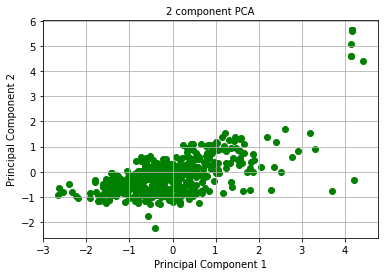

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
fig, ax = plt.subplots()
plt.scatter(PCA_f['principal component 1'],PCA_f['principal component 2'],color ='green') 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.grid()
plt.show()

In [46]:
#Commonality (матрица корреляций)
import numpy as np
C = np.corrcoef(PCA_f['principal component 1'],PCA_f['principal component 2'])
corr = pd.DataFrame(C)
corr

,0,1
0,1.000000,0.767472
1,0.767472,1.000000


In [47]:
#Разница между значениями PCA (velocity)
#Убрать NaN значения
delta_PCA = PCA_f.diff()
delta_PCA.fillna(0, inplace=True)
delta_PCA.tail(100)

,principal component 1,principal component 2
TIME,,
172100000,0.254413,0.150809
172200000,-0.524619,-0.062767
172300000,-0.006155,-0.137116
172400000,0.473307,0.012889
172500000,-0.453791,-0.291013
...,...,...
185600000,0.000000,0.000000
185700000,0.000000,0.000000
185800000,0.000000,0.000000


In [48]:
delta_PCA.index= delta_PCA.index.astype(str).str[:-3]
delta_PCA

,principal component 1,principal component 2
TIME,,
100000,0.000000,0.000000
100100,2.782017,-1.532386
100200,-1.310771,1.139714
100300,0.394324,0.070474
100400,-1.429849,-0.197806
...,...,...
185600,0.000000,0.000000
185700,0.000000,0.000000
185800,0.000000,0.000000


In [49]:
import pandas as pd
with pd.ExcelWriter(r'C:\Users\User\Desktop\data2.xlsx') as writer:
    delta_PCA.to_excel(writer)

In [50]:
#Поиск 95% и 5% персентиля для 1-ой бумаги
import numpy as np
t_95 = np.percentile(delta_PCA['principal component 1'],95)
t_5 = np.percentile(delta_PCA['principal component 1'],5)
print('Percentile_95:',t_95,'Percentile_5:',t_5)


Percentile_95: 1.0684619004992422 Percentile_5: -0.9365257041240487


In [51]:
#Поиск 95% и 5% персентиля для 2-ой бумаги
t1_95 = np.percentile(delta_PCA['principal component 2'],95)
t1_5 = np.percentile(delta_PCA['principal component 2'],5)
print('Percentile_95:',t1_95,'Percentile_5:',t1_5)

Percentile_95: 0.6043309982019012 Percentile_5: -0.6073886584401778


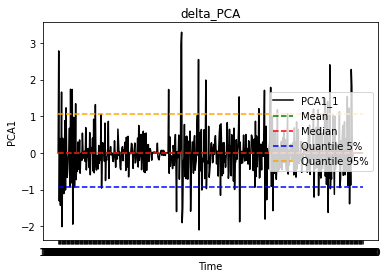

In [52]:
#Визуализация delta_PCA для 1 бумаги - Альроса
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title('delta_PCA')
plt.plot(delta_PCA.index, delta_PCA['principal component 1'], color='black', label='PCA1_1')
plt.plot(delta_PCA.index, [np.mean(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Mean', color='green', linestyle='--')
plt.plot(delta_PCA.index, [np.median(delta_PCA['principal component 1']) for i in range(len(delta_PCA['principal component 1']))], label='Median', color='red', linestyle='--')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.05) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 5%', color='blue', linestyle='dashed')
plt.plot(delta_PCA.index, [np.quantile(delta_PCA['principal component 1'], 0.95) for i in range(len(delta_PCA['principal component 1']))], label='Quantile 95%', color='orange', linestyle='dashed')
ax.set(xlabel='Time', ylabel='PCA1')
plt.legend(loc = 'right')
plt.show()

In [53]:
#Отобрать значения дельта PCA, где дельта PCA превышает 95% персентиль
T = delta_PCA.loc[delta_PCA['principal component 1']>=t_95]
T1 = T[['principal component 1']].reset_index('TIME')
T1

,TIME,principal component 1
0,100100,2.782017
1,100600,1.658886
2,101400,1.230240
3,102200,1.737475
4,102500,1.730723
5,103100,1.342979
6,110600,1.318331
7,131600,1.730289
8,133800,2.966787
9,133900,3.291482
